In [1]:
import pyforest

In [2]:
filename = '/home/jseia/Desktop/ml-dl/calc-det/data/INbreast Release 1.0/AllPNGs/full_imgs/20586934.png'
img1 = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
filename2 = '/home/jseia/Desktop/ml-dl/calc-det/data/INbreast Release 1.0/AllPNGs/full_imgs/20587320.png'
img2 = cv2.imread(filename2, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
im1 = np.zeros(np.array([img1.shape,img2.shape]).max(axis=0))
im2 = np.zeros(np.array([img1.shape,img2.shape]).max(axis=0))

im1[0:img1.shape[0], 0:img1.shape[1]] = img1
im2[0:img2.shape[0], 0:img2.shape[1]] = img2
im1 = np.where(im1>0, 1, 0)
im2 = np.where(im2>0, 1, 0)
im1 = im1[::4,::4]
im2 = im2[::4,::4]

In [4]:
import numpy as np
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.metrics import SSDMetric, CCMetric
import dipy.align.imwarp as imwarp
from dipy.data import get_fnames
from dipy.io.image import load_nifti_data
from dipy.segment.mask import median_otsu
from dipy.viz import regtools

/home/jseia/anaconda3/envs/calc_det/lib/python3.9/site-packages/dipy/viz/__init__.py:20: UserWarning: You do not have FURY installed. Therefore, 3D visualization functions will not work for you. Please install or upgrade FURY using pip install -U furyFor detailed installation instructions visit: https://fury.gl/
  warnings.warn(


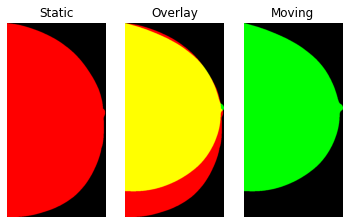

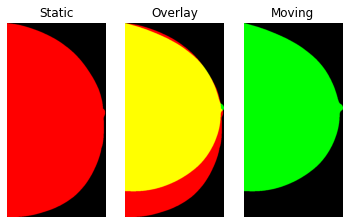

In [32]:
regtools.overlay_images(
    im1, im2, 'Static', 'Overlay', 'Moving', 'input_images.png'
)

In [33]:
dim = static.ndim
metric = SSDMetric(dim)

In [34]:
level_iters = [200, 100, 50, 25]

sdr = SymmetricDiffeomorphicRegistration(metric, level_iters, inv_iter=50)

In [35]:
mapping = sdr.optimize(im1, im2)

(array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 113.80747, 127.     , ..., 127.     , 127.     ,
         127.     ],
        [  0.     , 120.00205, 127.     , ..., 127.     , 127.     ,
         127.     ],
        ...,
        [  0.     , 127.     , 126.99999, ..., 127.     , 127.     ,
         127.     ],
        [  0.     , 127.     , 127.     , ..., 127.     , 127.     ,
         127.     ],
        [  0.     , 127.     , 127.     , ..., 127.     , 127.     ,
         127.     ]], dtype=float32),
 array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
           0.      ],
        [  0.      , 127.      , 120.63027 , ..., 127.      , 127.      ,
         127.      ],
        [  0.      , 126.99999 , 127.      , ..., 127.      , 127.      ,
         127.      ],
        ...,
        [  0.      , 110.490364, 127.      , ..., 127.      , 127.      ,
         127.      ],
        [  0.      , 116.27636 , 

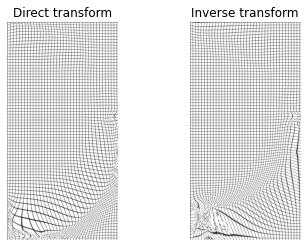

In [36]:
regtools.plot_2d_diffeomorphic_map(mapping, 10)

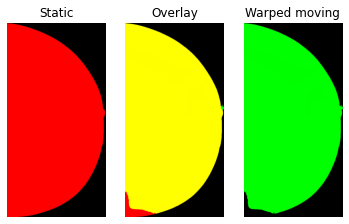

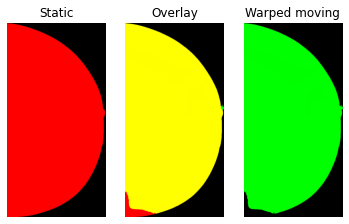

In [37]:
warped_moving = mapping.transform(im2, 'linear')
regtools.overlay_images(im1, warped_moving, 'Static', 'Overlay',
                        'Warped moving', 'direct_warp_result.png')

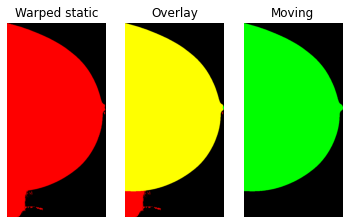

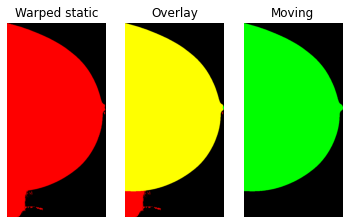

In [38]:
warped_static = mapping.transform_inverse(im1, 'linear')
regtools.overlay_images(warped_static, im2, 'Warped static', 'Overlay',
                        'Moving', 'inverse_warp_result.png')

In [40]:
from skimage import transform
tform = transform.estimate_transform('similarity', im1, im2)

In [44]:
im2_w = transform.warp(
    im1, inverse_map=tform.inverse) 

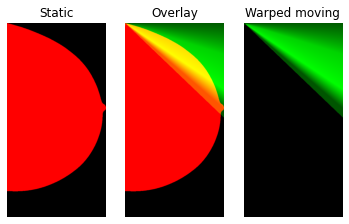

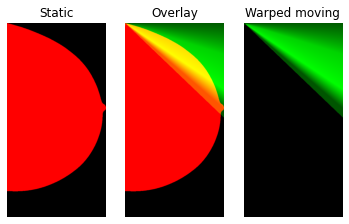

In [45]:
regtools.overlay_images(im2, im2_w, 'Static', 'Overlay',
                        'Warped moving')

In [42]:
np.allclose(tform.inverse(tform(im1)), im1)

ValueError: too many values to unpack (expected 2)

In [39]:
def callback_CC(sdr, status):
    # Status indicates at which stage of the optimization we currently are
    # For now, we will only react at the end of each resolution of the scale
    # space
    if status == imwarp.RegistrationStages.SCALE_END:
        # get the current images from the metric
        wmoving = sdr.metric.moving_image
        wstatic = sdr.metric.static_image
        # draw the images on top of each other with different colors
        regtools.overlay_images(wmoving, wstatic, 'Warped moving', 'Overlay',
                                'Warped static')

In [ ]:
sigma_diff = 3.0
radius = 4
metric = CCMetric(2, sigma_diff, radius)

In [ ]:
level_iters = [100, 50, 25]
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)
sdr.callback = callback_CC

In [ ]:
mapping = sdr.optimize(static, moving)

warped = mapping.transform(moving)